 ######                 2021  South Africa Divorce Data Science Project ###                                                                                                                                                                                                                     Module: Learning From Data                                                                                                                                                                                                                                                                                                                                                                                    By Mbusi Mabena                                                                                                                                                                                                                                        (Student  Number:216029072) 
 
 https://github.com/216029072/Titanic-Analysis-Project-/blob/main/EDA_Divorce%20_2021.ipynb





                                                 

                        

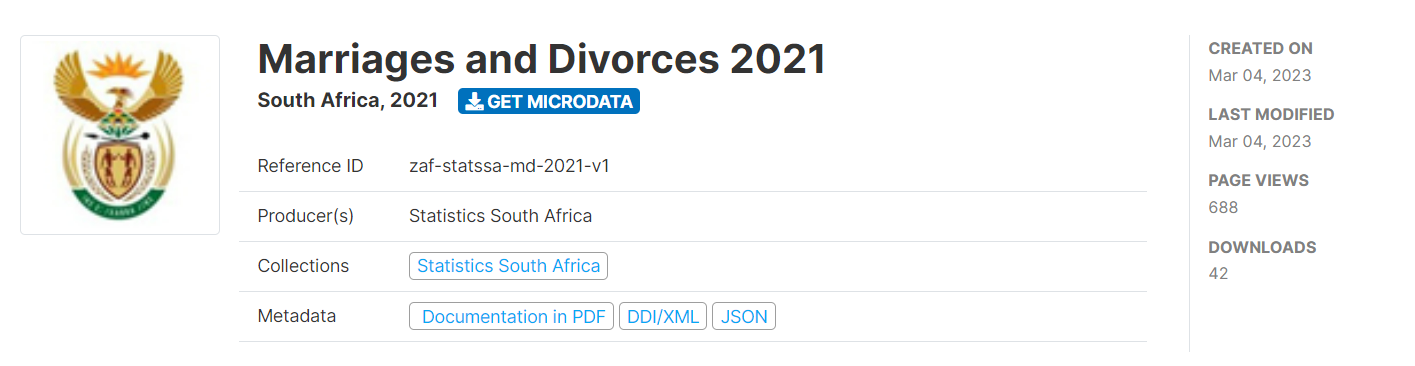


##  Variability and Location 

### Load Dataset

In [2]:
#load libraries 

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
##Load and clean data 

file_path = r'C:\Users\mbusi\OneDrive\Desktop\md-2021-divorces-v1 (1).xlsx '

data = pd.read_excel(file_path)

#Missing values 
Null = data.isnull().sum()

#Remove duplicates 
count_dup = data.duplicated().sum()
data = data.drop_duplicates()

# Normalization 
Word_Col = data.select_dtypes(include=['object']).columns
data[Word_Col] = data[Word_Col].apply(lambda x: x.str.title())

#Changes 
summary = {
    'Missing Values': Null,
    'Duplicates Removed': count_dup,
    'Columns Standardized': Word_Col .tolist()
}

summary

{'Missing Values': ProvinceCode                0
 MaleRace                    0
 FemaleRace                  0
 CoupleRace                  0
 MaleOccupation              1
 FemaleOccupation            0
 PlaintiffSex                0
 MaleStatus                  0
 FemaleStatus                0
 MaleNoTimesMarried          0
 FemaleNoTimesMarried        0
 MaleAge                   559
 FemaleAge                 486
 SolemnisationCode           0
 MarriagePropertySystem      0
 MarriageMonth               0
 MarriageYear                0
 NoOfChildren                0
 DivorceMonth                0
 DivorceYear                 0
 DurationOfMarriage          0
 MarriageType                0
 PolygamousMarriage          0
 GroundsForDivorce           0
 dtype: int64,
 'Duplicates Removed': 0,
 'Columns Standardized': ['ProvinceCode',
  'MaleRace',
  'FemaleRace',
  'CoupleRace',
  'MaleOccupation',
  'FemaleOccupation',
  'PlaintiffSex',
  'MaleStatus',
  'FemaleStatus',
  'Solemnisatio

In [4]:
#Show data 
data.head()

,ProvinceCode,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,MarriagePropertySystem,MarriageMonth,MarriageYear,NoOfChildren,DivorceMonth,DivorceYear,DurationOfMarriage,MarriageType,PolygamousMarriage,GroundsForDivorce
0,Western Cape,Black African,Black African,Black African,"Professional, Semi-Professional And Technical ...",Unspecified,Male,Never Married,Unspecified,1,...,In Community Of Property,March,2021,3,September,2021,0,Civil Marriage,Unspecified,Adultery
1,Free State,Black African,Black African,Black African,Unspecified,Unspecified,Male,Never Married,Never Married,1,...,In Community Of Property,August,2021,2,July,2021,0,Civil Marriage,No,Unspecified
2,Mpumalanga,White,White,White,Unspecified,Unspecified,Unspecified,Never Married,Never Married,1,...,In Community Of Property,May,2021,2,January,2021,0,Unspecified,Unspecified,Unspecified
3,Western Cape,Coloured,Coloured,Coloured,Not Economically Active / Unemployed,"Professional, Semi-Professional And Technical ...",Female,Never Married,Never Married,1,...,In Community Of Property,June,2021,2,August,2021,0,Civil Marriage,No,Desertion
4,Gauteng,Black African,Black African,Black African,"Transport, Delivery And Communications","Professional, Semi-Professional And Technical ...",Female,Never Married,Never Married,1,...,Out Of Community Of Property,February,2021,2,August,2021,0,Civil Marriage,No,Abuse


In [5]:
#See all headings
print(data.head().T)

                                                                        0  \
ProvinceCode                                                 Western Cape   
MaleRace                                                    Black African   
FemaleRace                                                  Black African   
CoupleRace                                                  Black African   
MaleOccupation          Professional, Semi-Professional And Technical ...   
FemaleOccupation                                              Unspecified   
PlaintiffSex                                                         Male   
MaleStatus                                                  Never Married   
FemaleStatus                                                  Unspecified   
MaleNoTimesMarried                                                      1   
FemaleNoTimesMarried                                                    1   
MaleAge                                                              40.0   

### Measures of Location 

In [6]:
#DurationOfMarriage Calculation 

DurationOfMarriage_min = data['DurationOfMarriage'].min()
DurationOfMarriage_max = data['DurationOfMarriage'].max()
DurationOfMarriage_mean = data['DurationOfMarriage'].mean()
DurationOfMarriage_median = data['DurationOfMarriage'].median()
DurationOfMarriag_mode= data['DurationOfMarriage'].mode()[0]

#NoOfChildren Calculation 
NoOfChildren_min = data['NoOfChildren'].min()
NoOfChildren_max = data['NoOfChildren'].max()
NoOfChildren_mean = data['NoOfChildren'].mean()
NoOfChildren_median = data['NoOfChildren'].median()
NoOfChildren_mode= data['NoOfChildren'].mode()[0]

#MaleAge Calculation 
MaleAge_min = data['MaleAge'].min()
MaleAge_max = data['MaleAge'].max()
MaleAge_mean= data['MaleAge'].mean()
MaleAge_median = data['MaleAge'].median()
MaleAge_mode = data['MaleAge'].mode()[0]

#Female Age Calculation 
FemaleAge_min = data['FemaleAge'].min()
FemaleAge_max = data['FemaleAge'].max()
FemaleAge_mean= data['FemaleAge'].mean()
FemaleAge_median = data['FemaleAge'].median()
FemaleAge_mode= data['FemaleAge'].mode()[0]

#MaleNoTimesMarried Calculation 
MaleNoTimesMarried_min = data['MaleNoTimesMarried'].min()
MaleNoTimesMarried_max = data['MaleNoTimesMarried'].max()
MaleNoTimesMarried_mean = data['MaleNoTimesMarried'].mean()
MaleNoTimesMarried_median   = data['MaleNoTimesMarried'].median()
MaleNoTimesMarried_mode   = data['MaleNoTimesMarried'].mode()[0]

#FemaleNoTimesMarried Calculation 
FemaleNoTimesMarried_min = data['FemaleNoTimesMarried'].min()
FemaleNoTimesMarried_max = data['FemaleNoTimesMarried'].max()
FemaleNoTimesMarried_mean  = data['FemaleNoTimesMarried'].mean()
FemaleNoTimesMarried_median   = data['FemaleNoTimesMarried'].median()
FemaleNoTimesMarried_mode  = data['FemaleNoTimesMarried'].mode()[0]


print("Measure of Location results " )

print("\nDurationOfMarriage Results " )
print("============================== " )

print("Min: " + str(DurationOfMarriage_min))
print("Max: " + str(DurationOfMarriage_max))
print("Mean : " + str(DurationOfMarriage_mean))
print("Median: " + str(DurationOfMarriage_median))
print("Mode: " + str(DurationOfMarriag_mode))


print("NoOfChildren Results " )
print("============================== " )

print("Min: " + str(NoOfChildren_min))
print("Max: " + str(NoOfChildren_max))
print("Mean : " + str(NoOfChildren_mean))
print("Median: " + str(NoOfChildren_median))
print("Mode: " + str(NoOfChildren_mode))





print("MaleAge Results " )
print("============================== " )

print("Min: " + str(MaleAge_min))
print("Max: " + str(MaleAge_max))
print("Mean : " + str(MaleAge_mean))
print("Median: " + str(MaleAge_median))
print("Mode: " + str(MaleAge_mode))



print("MaleNoTimesMarried Results " )
print("============================== " )

print("Min: " + str(MaleNoTimesMarried_min))
print("Max: " + str(MaleNoTimesMarried_max))
print("Mean : " + str(MaleNoTimesMarried_mean))
print("Median: " + str(MaleNoTimesMarried_median))
print("Mode: " + str(MaleNoTimesMarried_mode))

print("FemaleNoTimesMarried Results " )
print("============================== " )

print("Min: " + str(FemaleNoTimesMarried_min))
print("Max: " + str(FemaleNoTimesMarried_max))
print("Mean : " + str(FemaleNoTimesMarried_mean))
print("Median: " + str(FemaleNoTimesMarried_median))
print("Mode: " + str(FemaleNoTimesMarried_mode))






Measure of Location results 

DurationOfMarriage Results 
Min: 0
Max: 57
Mean : 12.425750072822604
Median: 11.0
Mode: 5
NoOfChildren Results 
Min: 0
Max: 7
Mean : 0.9735508301776872
Median: 1.0
Mode: 0
MaleAge Results 
Min: 21.0
Max: 89.0
Mean : 45.70938215102975
Median: 45.0
Mode: 39.0
MaleNoTimesMarried Results 
Min: 1
Max: 8
Mean : 1.130964171278765
Median: 1.0
Mode: 1
FemaleNoTimesMarried Results 
Min: 1
Max: 6
Mean : 1.103524614040198
Median: 1.0
Mode: 1


### Measures of Variability




In [7]:
#DurationOfMarriage Calculations

DurationOfMarriage_IQR= data['DurationOfMarriage'].quantile(0.75) - data['DurationOfMarriage'].quantile(0.25)
DurationOfMarriage_Standard_Dev = data['DurationOfMarriage'].std()
DurationOfMarriage_Range = data['DurationOfMarriage'].max() - data['DurationOfMarriage'].min()
DurationOfMarriage_Variance = data['DurationOfMarriage'].var()

#NoOfChildren Calculations
NoOfChildren_IQR= data['NoOfChildren'].quantile(0.75) - data['NoOfChildren'].quantile(0.25)
NoOfChildren_Standard_Dev = data['NoOfChildren'].std()
NoOfChildren_Range = data['NoOfChildren'].max() - data['NoOfChildren'].min()
NoOfChildren_Variance = data['NoOfChildren'].var()

#MaleAge Calculations
MaleAge_IQR= data['MaleAge'].quantile(0.75) - data['MaleAge'].quantile(0.25)
MaleAge_Standard_Dev = data['MaleAge'].std()
MaleAge_Range = data['MaleAge'].max() - data['MaleAge'].min()
MaleAge_Variance = data['MaleAge'].var()

#FemaleAge Calculations
FemaleAge_IQR= data['FemaleAge'].quantile(0.75) - data['FemaleAge'].quantile(0.25)
FemaleAge_Standard_Dev = data['FemaleAge'].std()
FemaleAge_Range = data['FemaleAge'].max() - data['FemaleAge'].min()
FemaleAge_Variance = data['FemaleAge'].var()

#MaleNoTimesMarried Calculations
MaleNoTimesMarried_IQR= data['MaleNoTimesMarried'].quantile(0.75) - data['MaleNoTimesMarried'].quantile(0.25)
MaleNoTimesMarried_Standard_Dev = data['MaleNoTimesMarried'].std()
MaleNoTimesMarried_Range= data['MaleNoTimesMarried'].max() - data['MaleNoTimesMarried'].min()
MaleNoTimesMarried_Variance = data['MaleNoTimesMarried'].var()

#FemaleNoTimesMarried Calculations
FemaleNoTimesMarried_IQR= data['FemaleNoTimesMarried'].quantile(0.75) - data['FemaleNoTimesMarried'].quantile(0.25)
FemaleNoTimesMarried_Standard_Dev = data['FemaleNoTimesMarried'].std()
FemaleNoTimesMarried_Range= data['FemaleNoTimesMarried'].max() - data['FemaleNoTimesMarried'].min()
FemaleNoTimesMarried_Variance = data['FemaleNoTimesMarried'].var()

#Results
print("\nDurationOfMarriage Results " )
print("============================== " )
print("Inter Quartile Range: " + str(DurationOfMarriage_IQR))
print("Standard Deviation: " + str(DurationOfMarriage_Standard_Dev))
print("Range : " + str(DurationOfMarriage_Range))
print("Variance: " + str(DurationOfMarriage_Variance))

print("\nNoOfChildren Results  " )
print("============================== " )
print("Inter Quartile Range: " + str(NoOfChildren_IQR))
print("Standard Deviation : " + str(NoOfChildren_Standard_Dev))
print("Range: " + str(NoOfChildren_Range))
print("Variance: " + str(NoOfChildren_Variance))

print("\nMaleAge Results  " )
print("============================== " )
print("Inter Quartile Range: " + str(MaleAge_IQR))
print("Standard Deviation: " + str(MaleAge_Standard_Dev))
print("Range: " + str(MaleAge_Range))
print("Variance : " + str(MaleAge_Variance))

print("\nFemaleAge Results " )
print("============================== " )
print("Inter Quartile Range: " + str(FemaleAge_IQR))
print("Standard Deviation: " + str(FemaleAge_Standard_Dev))
print("Range: " + str(FemaleAge_Range))
print("Variance: " + str(FemaleAge_Variance))

print("\nMaleNoTimesMarried Results  " )
print("============================== " )
print("Inter Quartile Range: " + str(MaleNoTimesMarried_IQR))
print("Standard Deviation: " + str(MaleNoTimesMarried_Standard_Dev))
print("Range: " + str(MaleNoTimesMarried_Range))
print("Variance: " + str(MaleNoTimesMarried_Variance))

print("\nFemaleNoTimesMarried Results " )
print("============================== " )
print("Inter Quartile Range: " + str(FemaleNoTimesMarried_IQR))
print("Standard Deviation: " + str(FemaleNoTimesMarried_Standard_Dev))
print("Range: " + str(FemaleNoTimesMarried_Range))
print("Variance: " + str(FemaleNoTimesMarried_Variance))




DurationOfMarriage Results 
Inter Quartile Range: 11.0
Standard Deviation: 8.575213920458571
Range : 57
Variance: 73.53429378162646

NoOfChildren Results  
Inter Quartile Range: 2.0
Standard Deviation : 1.0156085546333815
Range: 7
Variance: 1.031460736244506

MaleAge Results  
Inter Quartile Range: 13.0
Standard Deviation: 9.784216524574303
Range: 68.0
Variance : 95.73089299975284

FemaleAge Results 
Inter Quartile Range: 13.0
Standard Deviation: 9.344208879646406
Range: 67.0
Variance: 87.31423958646272

MaleNoTimesMarried Results  
Inter Quartile Range: 0.0
Standard Deviation: 0.38992142446268735
Range: 7
Variance: 0.1520387172550112

FemaleNoTimesMarried Results 
Inter Quartile Range: 0.0
Standard Deviation: 0.34769916246228194
Range: 5
Variance: 0.12089470757697232


### Quartiles and Percentiles 


In [8]:
print("\nDurationOfMarriage Quantiles:")
DurationOfMarriage_QnP=data['DurationOfMarriage'].quantile(
    
    [0,0.1,0.25,0.5,0.75,0.80,0.90,0.95,1] 
)
print(DurationOfMarriage_QnP)

print("\nNoOfChildren Quantiles:")
NoOfChildrenQnP=data['NoOfChildren'].quantile(
    [0,0.1,0.25,0.5,0.75,0.80,0.90,0.95,1]  
)
print(NoOfChildrenQnP)

print("\nMaleAge:")
MaleAge_QnP=data['MaleAge'].quantile(
     [0,0.1,0.25,0.5,0.75,0.80,0.90,0.95,1] 
)
print(MaleAge_QnP) 

print("\nFemaleAge Quantiles:")
FemaleAge_QnP=data['FemaleAge'].quantile( 
    [0,0.1,0.25,0.5,0.75,0.80,0.90,0.95,1] 
)
print(FemaleAge_QnP)

print("\nMaleNoTimesMarried' Quantiles:")
MaleNoTimesMarried_QnP=data['MaleNoTimesMarried'].quantile(
     [0,0.1,0.25,0.5,0.75,0.80,0.90,0.95,1] 
)
print(MaleNoTimesMarried_QnP)

print("\nFemaleNoTimesMarried Quantiles:")
FemaleNoTimesMarried_QnP=data['FemaleNoTimesMarried'].quantile( 
     [0,0.1,0.25,0.5,0.75,0.80,0.90,0.95,1] 
)
print(FemaleNoTimesMarried_QnP)






DurationOfMarriage Quantiles:
0.00     0.0
0.10     3.0
0.25     6.0
0.50    11.0
0.75    17.0
0.80    19.0
0.90    25.0
0.95    29.0
1.00    57.0
Name: DurationOfMarriage, dtype: float64

NoOfChildren Quantiles:
0.00    0.0
0.10    0.0
0.25    0.0
0.50    1.0
0.75    2.0
0.80    2.0
0.90    2.0
0.95    3.0
1.00    7.0
Name: NoOfChildren, dtype: float64

MaleAge:
0.00    21.0
0.10    34.0
0.25    39.0
0.50    45.0
0.75    52.0
0.80    54.0
0.90    59.0
0.95    63.0
1.00    89.0
Name: MaleAge, dtype: float64

FemaleAge Quantiles:
0.00    19.0
0.10    31.0
0.25    35.0
0.50    41.0
0.75    48.0
0.80    50.0
0.90    55.0
0.95    59.0
1.00    86.0
Name: FemaleAge, dtype: float64

MaleNoTimesMarried' Quantiles:
0.00    1.0
0.10    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.80    1.0
0.90    2.0
0.95    2.0
1.00    8.0
Name: MaleNoTimesMarried, dtype: float64

FemaleNoTimesMarried Quantiles:
0.00    1.0
0.10    1.0
0.25    1.0
0.50    1.0
0.75    1.0
0.80    1.0
0.90    1.0
0.95    2.0
1.00 

### Geometric Mean 


In [9]:

DurationOfMarriage_pos_num= data['DurationOfMarriage'][data['DurationOfMarriage'] > 0]
DurationOfMarriage_geo_mean = np.exp(np.log(DurationOfMarriage_pos_num).mean())

NoOfChildren_pos_num= data['NoOfChildren'][data['NoOfChildren'] > 0]
NoOfChildren_geo_mean = np.exp(np.log(NoOfChildren_pos_num).mean())

MaleAge_pos_num= data['MaleAge'][data['MaleAge'] > 0]
MaleAge_geo_mean = np.exp(np.log(MaleAge_pos_num).mean())

FemaleAge_pos_num= data['FemaleAge'][data['FemaleAge'] > 0]
FemaleAge_geo_mean = np.exp(np.log(FemaleAge_pos_num).mean())

MaleNoTimesMarried_pos_num= data['MaleNoTimesMarried'][data['MaleNoTimesMarried'] > 0]
MaleNoTimesMarried_geo_mean = np.exp(np.log(MaleNoTimesMarried_pos_num).mean())

FemaleNoTimesMarried_pos_num= data['FemaleNoTimesMarried'][data['FemaleNoTimesMarried'] > 0]
FemaleNoTimesMarried_geo_mean = np.exp(np.log(FemaleNoTimesMarried_pos_num).mean())

print("Geometric Mean Results ")
print("=========================")
print("Geometric Mean for DurationOfMarriage : " + str(DurationOfMarriage_geo_mean))
print("Geometric Mean for NoOfChildren : " + str(NoOfChildren_geo_mean ))
print("Geometric Mean for MaleAge : " + str(MaleAge_geo_mean ))
print("Geometric Mean for FemaleAge: " + str(FemaleAge_geo_mean))
print("Geometric Mean for MaleNoTimesMarried : " + str(MaleNoTimesMarried_geo_mean ))
print("Geometric Mean for FemaleNoTimesMarried: " + str(DurationOfMarriage_geo_mean))

Geometric Mean Results 
Geometric Mean for DurationOfMarriage : 9.609797380359666
Geometric Mean for NoOfChildren : 1.5264025019133791
Geometric Mean for MaleAge : 44.678309892738525
Geometric Mean for FemaleAge: 41.0535170018767
Geometric Mean for MaleNoTimesMarried : 1.089991739376997
Geometric Mean for FemaleNoTimesMarried: 9.609797380359666


### Skewness for 'DurationOfMarriage'

In [10]:
cols= [
    'DurationOfMarriage',
    'NoOfChildren',
    'MaleAge',
    'FemaleAge',
    'FemaleNoTimesMarried',
    'MaleNoTimesMarried'
]

print("Skewness Calcualtion")
print("==================")
#loop through
for col in cols:
    skew_result = data[col].skew()
    print(f"\n{col} Skewness: {skew_result}")

Skewness Calcualtion

DurationOfMarriage Skewness: 1.1285981060349917

NoOfChildren Skewness: 0.7764437685380734

MaleAge Skewness: 0.4767228151864469

FemaleAge Skewness: 0.5546088081212446

FemaleNoTimesMarried Skewness: 3.972117198785465

MaleNoTimesMarried Skewness: 3.7881733550147105


### Covariance and Correlation between 'DurationOfMarriage' and 'NoOfChildren'


In [11]:
#Covariance and Correlation Calculation
DurationOfMarriage_covariance_2d_NoOfChildren= data[['DurationOfMarriage', 'NoOfChildren']].cov()
DurationOfMarriage_correlation_2d_NoOfChildren= data[['DurationOfMarriage', 'NoOfChildren']].corr()

print("Covariance :" + str(DurationOfMarriage_covariance_2d_NoOfChildren))
print("Covariance : " + str(DurationOfMarriage_correlation_2d_NoOfChildren))


Covariance :                    DurationOfMarriage  NoOfChildren
DurationOfMarriage           73.534294     -0.794728
NoOfChildren                 -0.794728      1.031461
Covariance :                     DurationOfMarriage  NoOfChildren
DurationOfMarriage            1.000000     -0.091253
NoOfChildren                 -0.091253      1.000000


## Five-Number Summary


In [12]:
#Headings
Five_Num_heaidings = ['DurationOfMarriage', 'NoOfChildren', 'MaleAge', 'FemaleAge',    'FemaleNoTimesMarried',
    'MaleNoTimesMarried']

#display results 
print("Five-Number Summary")

print("========================")
for column in Five_Num_heaidings:
    print(f'\nFive-Number Summary of {column}')
    five_results = data[column].describe()[['min','25%','50%','75%', 'max']]
    print(five_results, '\n')

Five-Number Summary

Five-Number Summary of DurationOfMarriage
min     0.0
25%     6.0
50%    11.0
75%    17.0
max    57.0
Name: DurationOfMarriage, dtype: float64 


Five-Number Summary of NoOfChildren
min    0.0
25%    0.0
50%    1.0
75%    2.0
max    7.0
Name: NoOfChildren, dtype: float64 


Five-Number Summary of MaleAge
min    21.0
25%    39.0
50%    45.0
75%    52.0
max    89.0
Name: MaleAge, dtype: float64 


Five-Number Summary of FemaleAge
min    19.0
25%    35.0
50%    41.0
75%    48.0
max    86.0
Name: FemaleAge, dtype: float64 


Five-Number Summary of FemaleNoTimesMarried
min    1.0
25%    1.0
50%    1.0
75%    1.0
max    6.0
Name: FemaleNoTimesMarried, dtype: float64 


Five-Number Summary of MaleNoTimesMarried
min    1.0
25%    1.0
50%    1.0
75%    1.0
max    8.0
Name: MaleNoTimesMarried, dtype: float64 



## Kurtosis ( Not Covered in Class )

In [13]:

#headings
Kurt_Corbain = [
    'DurationOfMarriage',
    'NoOfChildren',
    'MaleAge',
    'FemaleAge',
    'MaleNoTimesMarried',
    'FemaleNoTimesMarried'
]
#display results 
print("Kurtosis Results:")

print("========================")


#loop through resuls and headings
for column in  Kurt_Corbain:
    k_results = data[column].kurtosis()
    print(f'Kurtosis of{column}:{k_results}')

Kurtosis Results:
Kurtosis ofDurationOfMarriage:1.307535816260823
Kurtosis ofNoOfChildren:-0.058661278928317184
Kurtosis ofMaleAge:0.15364299905677115
Kurtosis ofFemaleAge:0.16464484491031683
Kurtosis ofMaleNoTimesMarried:22.291601343322956
Kurtosis ofFemaleNoTimesMarried:20.546619640244018


## Harmonic mean  ( Not Covered in Class)

In [14]:
harmonic_mean_DurationOfMarriage = stats.hmean(data['DurationOfMarriage']
                                               .replace(0, np.nan).dropna())

harmonic_Mean_NoOfChildren = stats.hmean(data['NoOfChildren']
                                         .replace(0, np.nan).dropna())

harmonic_mean_MaleAge= stats.hmean(data['MaleAge']
                                   .replace(0, np.nan).dropna())

harmonic_Mean_FemaleAge = stats.hmean(data['FemaleAge']
                                      .replace(0, np.nan).dropna())

harmonic_mean_MaleNoTimesMarried = stats.hmean(data['MaleNoTimesMarried']
                                               .replace(0, np.nan).dropna())

harmonic_Mean_FemaleNoTimesMarried = stats.hmean(data['FemaleNoTimesMarried']
                                                 .replace(0, np.nan).dropna())

print("Harmonic mean Results:")

print("========================")


print("Harmonic mean of DurationOfMarriage: " 
      + str(harmonic_mean_DurationOfMarriage))

print("Harmonic mean of NoOfChildren: "
      + str(harmonic_Mean_NoOfChildren))

print("Harmonic mean of MaleAge: " 
      + str(harmonic_mean_MaleAge))

print("Harmonic mean of FemaleAge: " 
      + str(harmonic_Mean_FemaleAge))

print("Harmonic mean of MaleNoTimesMarried: "
      + str(harmonic_mean_MaleNoTimesMarried))

print("Harmonic mean of FemaleNoTimesMarried: "
      + str(harmonic_Mean_FemaleNoTimesMarried))


Harmonic mean Results:
Harmonic mean of DurationOfMarriage: 6.759503084544606
Harmonic mean of NoOfChildren: 1.3984877031677847
Harmonic mean of MaleAge: 43.65692315108277
Harmonic mean of FemaleAge: 40.0662632843463
Harmonic mean of MaleNoTimesMarried: 1.064250273967719
Harmonic mean of FemaleNoTimesMarried: 1.0501093545278892


 ## DurationOfMarrige and NoOfChildren Covariance , Correlation Coefficient , Coefficient of Variation  

In [15]:
    # Calculations for Covariance
    cov_matrix = data[['DurationOfMarriage', 'NoOfChildren']].cov()
    covariance_DurationOfMarriage_NoOfChildren = cov_matrix.loc['DurationOfMarriage', 'NoOfChildren']

    # Calculations for Correlation coefficient
    cor_coefficient = data[['DurationOfMarriage', 'NoOfChildren']].corr().iloc[0, 1]

    # Calculations for Coefficient of Variation
    Coefficient_of_Variation_DurationOfMarriage = stats.variation(data['DurationOfMarriage'].dropna())
    Coefficient_of_Variation_NoOfChildren  = stats.variation(data['NoOfChildren'].dropna())
  

In [16]:
print("Covariance,Correlation and Coeffient of Variation Results:")

print("========================")

print("DurationOfMarriage and NoOfChildren Covariance :" + str(covariance_DurationOfMarriage_NoOfChildren ))
print("DurationOfMarriage and Correlation coefficiente : " + str(cor_coefficient))
print("DurationOfMarriage of Variation :" + str(Coefficient_of_Variation_DurationOfMarriage))
print("DCoefficient of NoOfChildren :" + str(Coefficient_of_Variation_NoOfChildren))



Covariance,Correlation and Coeffient of Variation Results:
DurationOfMarriage and NoOfChildren Covariance :-0.7947278878430738
DurationOfMarriage and Correlation coefficiente : -0.09125299764651498
DurationOfMarriage of Variation :0.690096298316178
DCoefficient of NoOfChildren :1.0431699496504407


 ## Z-scores

In [17]:
z_scores_DurationOfMarriage = stats.zscore(data['DurationOfMarriage'].dropna())
z_scores_NoOfChildren = stats.zscore(data['NoOfChildren'].dropna())
z_scores_MaleAge = stats.zscore(data['MaleAge'].dropna())
z_scores_FemaleAge = stats.zscore(data['FemaleAge'].dropna())
z_scores_MaleNoTimesMarried = stats.zscore(data['MaleNoTimesMarried'].dropna())
z_scores_FemaleNoTimesMarried = stats.zscore(data['FemaleNoTimesMarried'].dropna())

print("Z-Scores Results:")

print("========================")

print("Z-scores for DurationOfMarriage :" + str(z_scores_DurationOfMarriage))
print("======================================================================")
print("Z-scores for NoOfChildren :" + str(z_scores_NoOfChildren))
print("======================================================================")
print("Z-scores for MaleAge :" + str(z_scores_MaleAge))
print("======================================================================")
print("Z-scores for FemaleAge :" + str(z_scores_FemaleAge))
print("======================================================================")
print("Z-scores for MaleNoTimesMarried :" + str(z_scores_MaleNoTimesMarried))
print("======================================================================")
print("Z-scores for FemaleNoTimesMarried:" + str(z_scores_DurationOfMarriage))

Z-Scores Results:
Z-scores for DurationOfMarriage :0       -1.449073
1       -1.449073
2       -1.449073
3       -1.449073
4       -1.449073
           ...   
17160    4.731711
17161    4.731711
17162    4.848329
17163    4.964948
17164    5.198185
Name: DurationOfMarriage, Length: 17165, dtype: float64
Z-scores for NoOfChildren :0        1.995363
1        1.010703
2        1.010703
3        1.010703
4        1.010703
           ...   
17160   -0.958617
17161   -0.958617
17162   -0.958617
17163   -0.958617
17164   -0.958617
Name: NoOfChildren, Length: 17165, dtype: float64
Z-scores for MaleAge :0       -0.583547
1       -0.685756
2        0.234121
3       -0.379130
4        0.131912
           ...   
17160    3.504793
17161    2.993750
17162    2.789333
17163    3.709210
17164    3.709210
Name: MaleAge, Length: 16606, dtype: float64
Z-scores for FemaleAge :0       -1.077002
1       -1.505088
2        0.635339
3        0.100233
4       -0.969981
           ...   
17159    3.096831
17161

 ## Weighted mean of 'DurationOfMarriage' and 'NoOfChildren'

In [18]:
DurationOfMarriage_NoOfChildren_weighted_mean_duration = np.average(data['DurationOfMarriage'],weights=data['NoOfChildren'])


print("Weighted Mean Results:")

print("========================")

print("Weighted mean of DurationOfMarriage and NoOfChildren :" + str(DurationOfMarriage_NoOfChildren_weighted_mean_duration))

Weighted Mean Results:
Weighted mean of DurationOfMarriage and NoOfChildren :11.6094787864281


## Chebyshev Theorem 


In [19]:
    def chebyshev_theorem(col, x):
        
        standard_dev= col.std()
        
        col_mean= col.mean()
        
        down=col_mean - x * standard_dev
        
        up=col_mean + x * standard_dev
        
        check = col[(col >= down) & (col <=up)]
        
        return len(check) /len(col)
    
    
print("Chebyshev Results:")

print("========================")
    
    
    
# Chebyshev theorem functions better on normally distributed data
    MaleAge_chebyshev = chebyshev_theorem(data['MaleAge'], 2)
    
    FemaleAge_chebyshev = chebyshev_theorem(data['FemaleAge'], 2)
    
    print("Chebyshev_theorem result for MaleAge :" + str(MaleAge_chebyshev)) 
    
    print("Chebyshev_theorem result for FemaleAge :" + str(FemaleAge_chebyshev)) 
    
 
    

Chebyshev Results:
Chebyshev_theorem result for MaleAge :0.9304981066122925
Chebyshev_theorem result for FemaleAge :0.9310806874453831


## Empirical Rule

In [20]:
    def empirical_rule(col):
        
        standard_dev = col.std()
        col_mean = col.mean()
      
        one_standard_dev = col[(col >= col_mean - standard_dev) 
                        & (col_mean <= col_mean + standard_dev)]
        
        two_standard_dev = col[(col >= col_mean - 2 * standard_dev)
                         & (col_mean <= col_mean + 2 * standard_dev)]
            
        third_standard_dev =col[(col >= col_mean - 3 * standard_dev)& 
                            (col_mean <= col_mean + 3 * standard_dev)]
        
        
       
        
        return (len(one_standard_dev)/ len(col),
                len(two_standard_dev)/ len(col), 
                len(third_standard_dev) / len(col))


print("========================")  
    
# Using DurationOfMarriage and NoOfChildren becuase they are not  normally distributed 

    empirical_rule_DurationOfMarriage = empirical_rule(data['DurationOfMarriage'])
    empirical_children_rule_NoOfChildren = empirical_rule(data['NoOfChildren'])
    
    
    
    print("Empirical rule result for MaleAge :" + str(empirical_rule_DurationOfMarriage)) 
    
    print("Empirical rule result for FemaleAge :" + str(empirical_children_rule_NoOfChildren)) 
 

Empirical rule result for MaleAge :(0.8870958345470434, 1.0, 1.0)
Empirical rule result for FemaleAge :(1.0, 1.0, 1.0)


# Visuals 

BoxPlot

DurationOfMarriage,NoOfChildren,MaleAge BoxPlot 


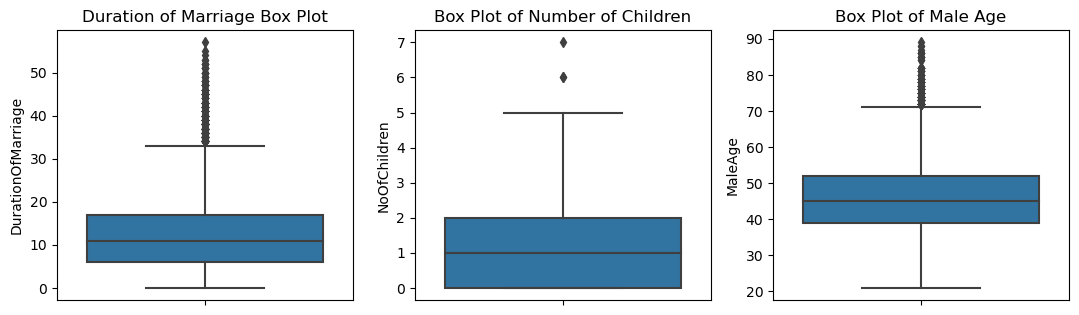

In [21]:


print("DurationOfMarriage,NoOfChildren,MaleAge BoxPlot ")


plt.figure(figsize=(14
                    , 9))


plt.subplot(3, 
            4, 
            2)  

sns.boxplot(y='DurationOfMarriage',data=data)
plt.title('Duration of Marriage Box Plot')


plt.subplot(3, 
            
            4, 
            3) 

sns.boxplot(y='NoOfChildren',data=data )
plt.title('Box Plot of Number of Children')




plt.subplot(3, 
            4, 
            4)  

sns.boxplot(y='MaleAge',data=data)
plt.title('Box Plot of Male Age')


plt.tight_layout()
plt.show()

# Graphs to see skewness

Histogram graphs to see Skewness of Data 


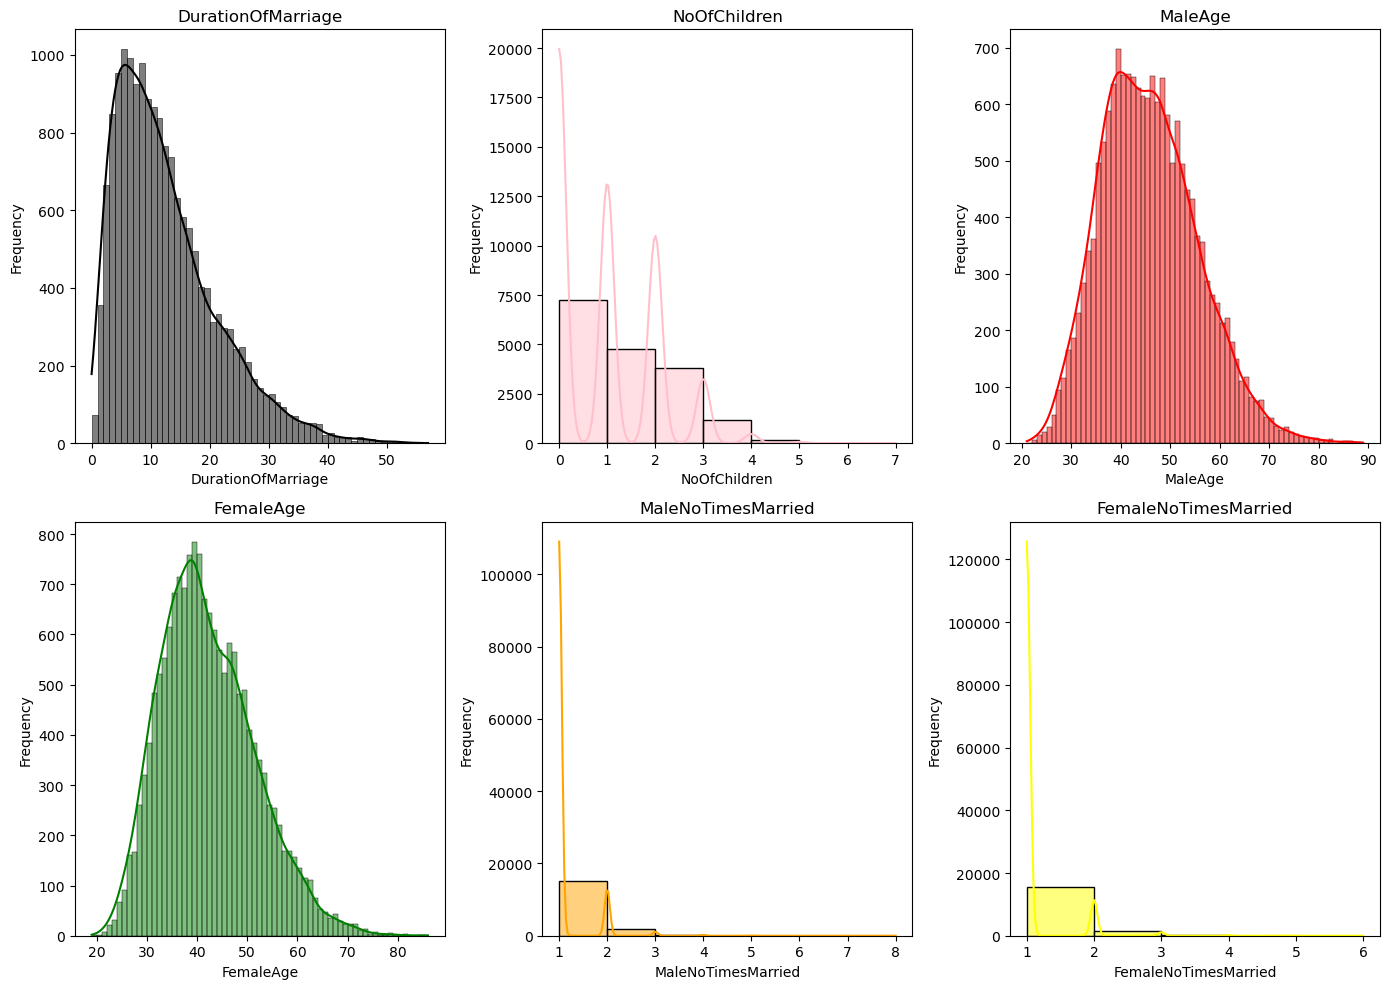

In [22]:
#All headings
col = ['DurationOfMarriage', 'NoOfChildren', 'MaleAge', 'FemaleAge', 'MaleNoTimesMarried', 'FemaleNoTimesMarried']

# Colors 
his_colors = ['black', 'pink','red','green', 'orange','yellow' ]
plt.figure(figsize=(14,10))


print("Histogram graphs to see Skewness of Data ")

print("========================") 

for i, column in enumerate(col, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(data[column].dropna(), kde=True, binwidth=1, color=his_colors[i-1])
    plt.xlabel(f'{column}')
    plt.title(f'{column}') 
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Visuals


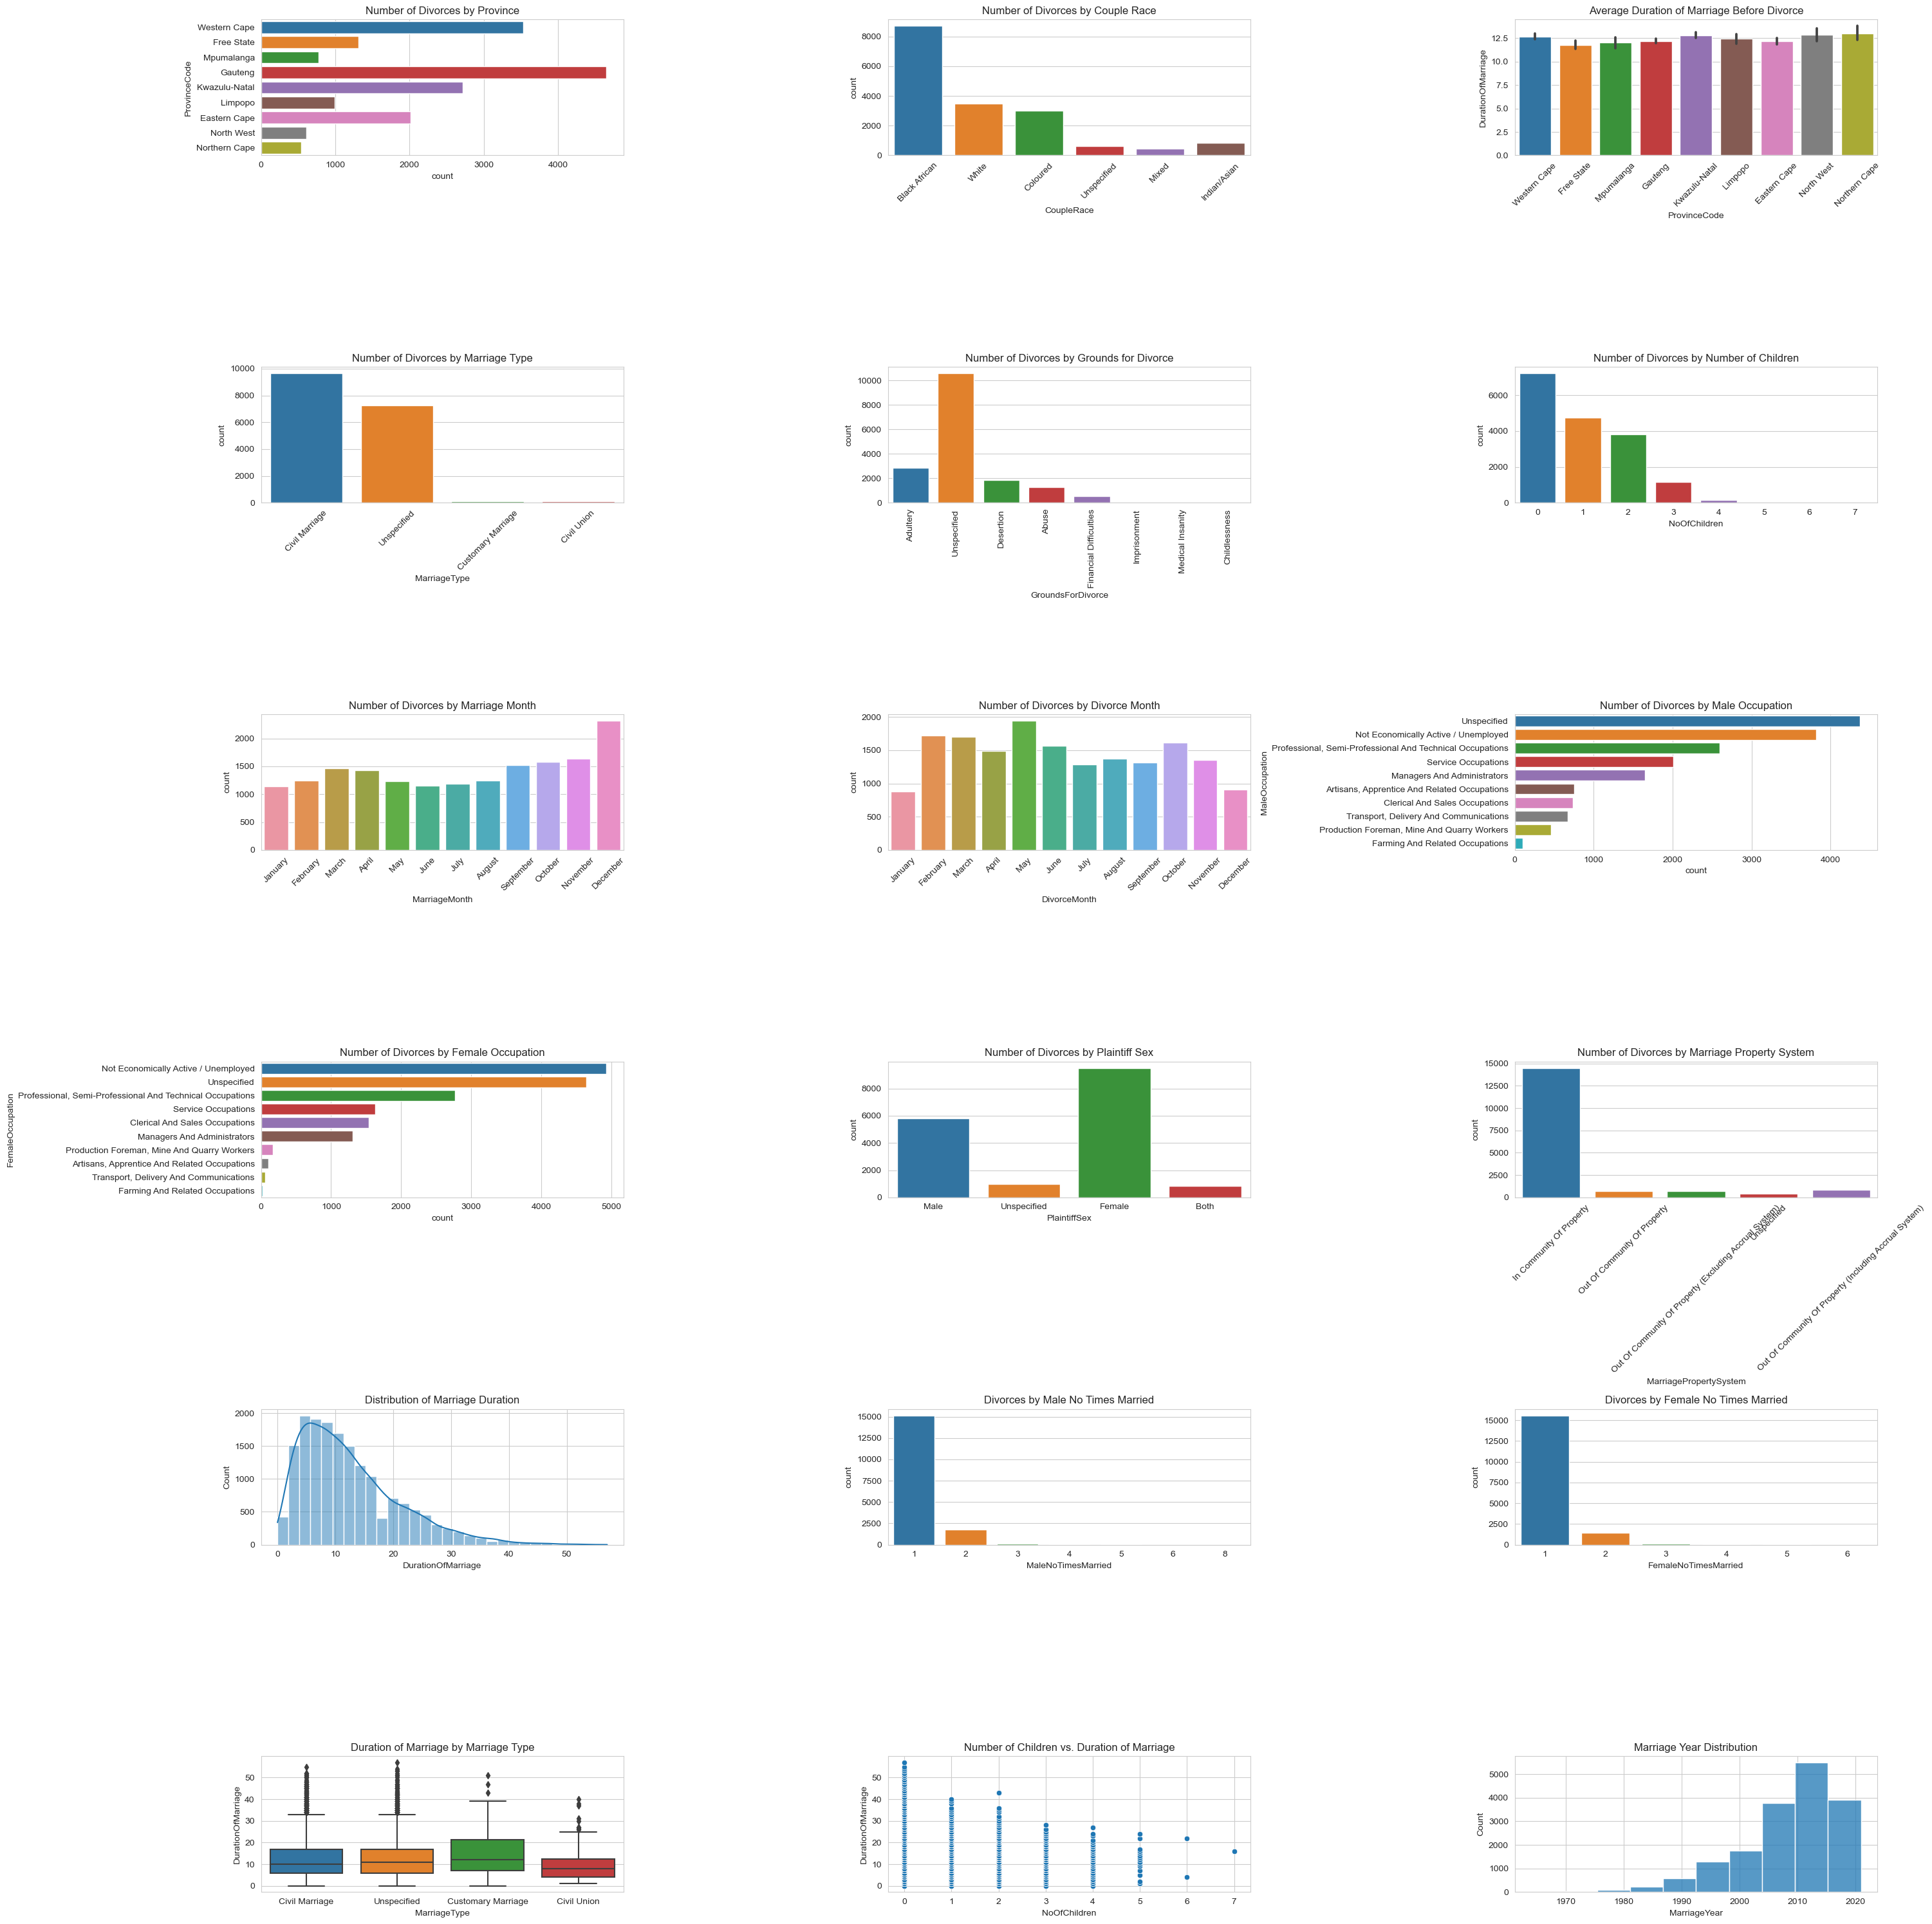

In [23]:

#background 
sns.set_style('whitegrid')

# Spread Visuals 
figure, x_axis = plt.subplots(nrows=6, ncols=3, figsize=(30, 30))

# Headings
Headings = [
    'Number of Divorces by Province',
    'Number of Divorces by Couple Race',
    'Average Duration of Marriage Before Divorce',
    'Number of Divorces by Marriage Type',
    'Number of Divorces by Grounds for Divorce',
    'Number of Divorces by Number of Children',
    'Number of Divorces by Marriage Month',
    'Number of Divorces by Divorce Month',
    'Number of Divorces by Male Occupation',
    'Number of Divorces by Female Occupation',
    'Number of Divorces by Plaintiff Sex',
    'Number of Divorces by Marriage Property System',
    'Distribution of Marriage Duration',
    'Divorces by Male No Times Married',
    'Divorces by Female No Times Married',
    'Duration of Marriage by Marriage Type',
    'Number of Children vs. Duration of Marriage',
    'Marriage Year Distribution'
]

print("Visuals")

print("========================") 


# Generate each plot
for i, ax in enumerate(x_axis.flatten()):
    if i < len(Headings ):
        title = Headings [i]
        ax.set_title(title)
        
        if title == 'Number of Divorces by Province':
            sns.countplot(ax=ax ,data=data, y='ProvinceCode')
            
        elif title == 'Number of Divorces by Couple Race':
            sns.countplot(ax=ax,data=data, x='CoupleRace')
            ax.tick_params(axis='x', rotation=45)
            
        elif title == 'Average Duration of Marriage Before Divorce':
            sns.barplot(ax=ax,data=data, x='ProvinceCode', y='DurationOfMarriage',estimator=lambda x:sum(x) /len(x))
            ax.tick_params(axis='x', rotation=45)
            
        elif title == 'Number of Divorces by Marriage Type':
            sns.countplot(ax=ax,data=data, x='MarriageType')
            ax.tick_params(axis='x', rotation=45)
            
        elif title == 'Number of Divorces by Grounds for Divorce':
            sns.countplot( ax=ax,data=data, x='GroundsForDivorce')
            ax.tick_params(axis='x', rotation=90)
            
        elif title == 'Number of Divorces by Number of Children':
            sns.countplot( ax=ax,data=data, x='NoOfChildren')
            
        elif title == 'Number of Divorces by Marriage Month':
            months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
            sns.countplot(ax=ax,data=data, x='MarriageMonth',  order=months_order)
            ax.tick_params(axis='x', rotation=45)
            
        elif title == 'Number of Divorces by Divorce Month':
            months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
            sns.countplot(data=data, ax=ax, order=months_order,x='DivorceMonth')
            ax.tick_params(axis='x', rotation=45)
            
        elif title == 'Number of Divorces by Male Occupation':
            sns.countplot( ax=ax ,data=data, y='MaleOccupation', order=data['MaleOccupation'].value_counts().index)
            
        elif title == 'Number of Divorces by Female Occupation':
            sns.countplot( ax=ax,data=data, y='FemaleOccupation', order=data['FemaleOccupation'].value_counts().index)
            
        elif title == 'Number of Divorces by Plaintiff Sex':
            sns.countplot(ax=ax,data=data, x='PlaintiffSex')
            
        elif title == 'Number of Divorces by Marriage Property System':
            sns.countplot(data=data, x='MarriagePropertySystem', ax=ax)
            ax.tick_params(axis='x', rotation=45)
            
        elif title == 'Distribution of Marriage Duration':
            sns.histplot(ax=ax ,data=data, x='DurationOfMarriage', bins=30, kde=True)
            
        elif title == 'Divorces by Male No Times Married':
            sns.countplot( ax=ax,data=data, x='MaleNoTimesMarried')
            
        elif title == 'Divorces by Female No Times Married':
            sns.countplot( ax=ax,data=data, x='FemaleNoTimesMarried')
            
        elif title == 'Duration of Marriage by Marriage Type':
            sns.boxplot(ax=ax,data=data, x='MarriageType', y='DurationOfMarriage')
            
        elif title == 'Number of Children vs. Duration of Marriage':
            sns.scatterplot(ax=ax,data=data, x='NoOfChildren', y='DurationOfMarriage')
            
        elif title == 'Marriage Year Distribution':
            sns.histplot(data=data, x='MarriageYear', bins=10, kde=False, ax=ax)
# Straigtening
plt.tight_layout()
# Display 
plt.show()

# Linear Regression

In [27]:
pred_val = ['MaleNoTimesMarried', 'FemaleNoTimesMarried', 'NoOfChildren']
Dur_Mar = 'DurationOfMarriage'


data_x_train,  data_x_test  , data_y_train, data_y_test = train_test_split(
    data[pred_val], data[Dur_Mar], test_size=0.2, random_state=0
)
#Linear regression
model = LinearRegression()

# Fitting data
model.fit(data_x_train  ,  data_y_train)

# Predict
y_pred = model.predict( data_x_test)

# Calculation 
mean_squared_ = mean_squared_error(data_y_test ,  y_pred)



r2 = r2_score(data_y_test, y_pred)

print("Linear Regression results")

print("========================") 


# Divource Results 


print("r_Squared :  " + str(r2)) 
print("Model coefficients :" + str( model.intercept_)) 
print("Model intercept :" + str(model.coef_)) 
print("_Squared _Error Mean :" + str(mean_squared_)) 





Linear Regression results
r_Squared :  0.026234849060902676
Model coefficients :18.090403658008924
Model intercept :[-2.07961567 -2.12240366 -1.00760098]
_Squared _Error Mean :70.10996470144512


Conclusions and Findings
=======================
People are opting to get married late in their lives with the average age for males being 45.7 and 42.1 years for females . This could be because of people focusing on financial stability or pursing higher education.

We can also conclude that females prefer getting married to older men because the average age difference is 3.6 years. 

Average duration of marriages is 12.4 years 

Adultery, abuse and desertion are the top reasons for marriages failing but there is a lot of missing data to fully back this up  

Black African population has the highest divorce rate. 

There are 530 cases where financial difficulties is the reason for the divorce meaning money play a role in relationships 

Marriages lasting 44 years has desertion as the main reason. 

Most men got married in community of Property 

Black woman are the most who got remarried 

Marriages lasting 46 years had abuse as the main reason stating how difficult it is to leave a abusive relationship 

Females opted to get married out of community of property in their second marriage 

Most people who divorced in 2021 got married in 2010. Inflation of the rand might be the issue.

Most divorces people don’t have children mostly.  I think this is true because I recently read that birth rates have dropped in South Africa, this could be partly due to invention of the contraceptive. I need to investigate this again when I have time because it a theory I have. Same has been report in Asian countries. It may be a global problem or the extinction theory, This would a interesting data science project. Find old projects of mine here: https://github.com/216029072?tab=repositories

Black African people recorded the highest divorce rates, This could be because most of the population is Black African in South Africa.

Gauteng recorded the highest divorces, this could, this could be because it has the most population.  

Most marriages were civil marriage.

May was the month with the highest amount of people being divorced.

Most people get married in December, it could be because of the holidays to cater for most guests or a cultural thing. Some people get a 13th check then so the money might be used to cover the wedding. 

Women file for divorce the most.


Reflection 
============


What was different between Python and Excel?
======================================
The difference between python and excel is that python is easier to use for data analysis for than excel if you understand how to write code. It took me far less time to finish the task this time than the first one. The margin for error on excel is a lot than on python. Excel seemed a lot tedious to do but while using python I achieved a flow state, it might be because of the hours I have put into python. There is a lot more libraries on python which performs most of the heavy lifting. I would use excel when assisting someone with data analysis who does not come from a tech background. I guess sometimes there’s business problems that simply need a Vlookup or pivot table. 

When will you use either of them?
============================

Well, a dataframe is a spreadsheet but you wouldn’t need to use a dataframe to solve other problems because excel is a easier option. I often use excel at work when there is a manual process that no one has automated. Excel is often easier opt when explaining a concept to someone who is not data savvy. I use python when dealing with large data or there’s a complex problem I am trying to solve. 

Python would be a good option for building machine learning models. Some topics like Natural Language processing would be impossible to on excel. I cant even fathom how you would create a word corpus on excel it would be impossible but there is actuaries who still use excel in banks and I have seen some financial analyst perform liner regression to forecast on excel which would be very hard for me knowing how easy python would make the whole operation. 

If you could do this assignment over, what would you do differently? What are the gaps in your programming or stats knowledge?
==============================================
If I could do this project again, I would focus more on conditional formatting because it makes the notebook look better and cleaner code. I would not change much because male and female relationships is a topic that I have always been fascinated about and to perform behavioural science is always a blessing and is a critical skill to have especially in fields like marketing. 








